In [40]:
import pickle
import matplotlib.pyplot as plt
import numpy as np  
import pandas as pd

In [41]:
with open("../tracker_stubs/balls.pkl","rb") as f:
    ball_pos = pickle.load(f)
    

In [42]:
ball_pos = [x.get(1,[]) for x in ball_pos]
df_ball_pos = pd.DataFrame(ball_pos,columns=["x1","y1","x2","y2"])
df_ball_pos = df_ball_pos.interpolate()
df_ball_pos = df_ball_pos.bfill()
df_ball_pos

,x1,y1,x2,y2
0,892.740051,614.842346,912.821960,636.365662
1,892.740051,614.842346,912.821960,636.365662
2,876.136322,630.968353,896.552582,653.179504
3,859.532593,647.094360,880.283203,669.993347
4,847.431213,658.583801,867.474121,680.574066
...,...,...,...,...
209,1184.488281,248.282776,1199.705811,265.618744
210,1184.576294,233.534973,1196.093628,246.410583
211,1183.293213,227.154877,1195.682007,241.841766
212,1180.384644,213.835648,1194.388184,229.726593


In [43]:
df_ball_pos["y_mid"] = (df_ball_pos["y1"] + df_ball_pos["y2"])/2    
df_ball_pos["y_mid_rolling_mean"] = df_ball_pos["y_mid"].rolling(window=5,min_periods=1,center=False).mean()

In [44]:
df_ball_pos

,x1,y1,x2,y2,y_mid,y_mid_rolling_mean
0,892.740051,614.842346,912.821960,636.365662,625.604004,625.604004
1,892.740051,614.842346,912.821960,636.365662,625.604004,625.604004
2,876.136322,630.968353,896.552582,653.179504,642.073929,631.093979
3,859.532593,647.094360,880.283203,669.993347,658.543854,637.956448
4,847.431213,658.583801,867.474121,680.574066,669.578934,644.280945
...,...,...,...,...,...,...
209,1184.488281,248.282776,1199.705811,265.618744,256.950760,283.085240
210,1184.576294,233.534973,1196.093628,246.410583,239.972778,269.071249
211,1183.293213,227.154877,1195.682007,241.841766,234.498322,256.814764
212,1180.384644,213.835648,1194.388184,229.726593,221.781120,244.867238


Text(0.5, 1.0, 'y_mid_rolling_mean')

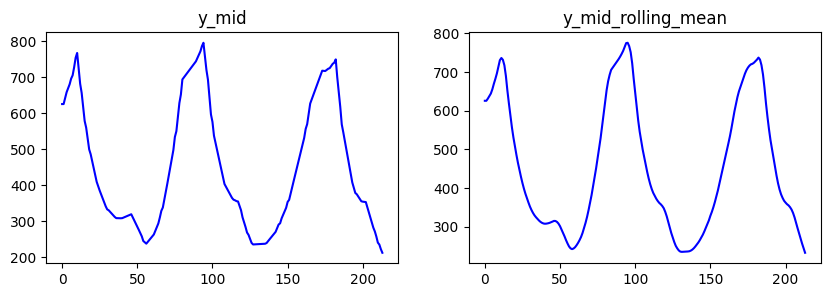

In [45]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))

# Plot first column
axes[0].plot(df_ball_pos["y_mid"], color='blue')
axes[0].set_title('y_mid')

# Plot second column
axes[1].plot(df_ball_pos["y_mid_rolling_mean"], color='blue')
axes[1].set_title('y_mid_rolling_mean')

In [46]:
df_ball_pos["y_delta"] = df_ball_pos["y_mid_rolling_mean"].diff()
df_ball_pos

,x1,y1,x2,y2,y_mid,y_mid_rolling_mean,y_delta
0,892.740051,614.842346,912.821960,636.365662,625.604004,625.604004,NaN
1,892.740051,614.842346,912.821960,636.365662,625.604004,625.604004,0.000000
2,876.136322,630.968353,896.552582,653.179504,642.073929,631.093979,5.489975
3,859.532593,647.094360,880.283203,669.993347,658.543854,637.956448,6.862469
4,847.431213,658.583801,867.474121,680.574066,669.578934,644.280945,6.324497
...,...,...,...,...,...,...,...
209,1184.488281,248.282776,1199.705811,265.618744,256.950760,283.085240,-13.470793
210,1184.576294,233.534973,1196.093628,246.410583,239.972778,269.071249,-14.013991
211,1183.293213,227.154877,1195.682007,241.841766,234.498322,256.814764,-12.256484
212,1180.384644,213.835648,1194.388184,229.726593,221.781120,244.867238,-11.947527


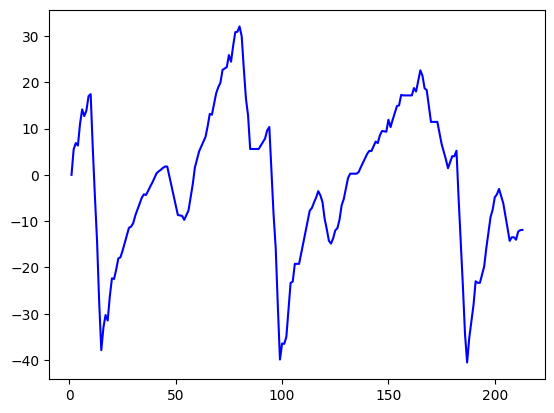

In [47]:
plt.plot(df_ball_pos["y_delta"], color='blue')

In [52]:
df_ball_pos["ball_hit"] =0
df_ball_pos.head(13)

,x1,y1,x2,y2,y_mid,y_mid_rolling_mean,y_delta,ball_hit
0,892.740051,614.842346,912.821960,636.365662,625.604004,625.604004,NaN,0
1,892.740051,614.842346,912.821960,636.365662,625.604004,625.604004,0.000000,0
2,876.136322,630.968353,896.552582,653.179504,642.073929,631.093979,5.489975,0
3,859.532593,647.094360,880.283203,669.993347,658.543854,637.956448,6.862469,0
4,847.431213,658.583801,867.474121,680.574066,669.578934,644.280945,6.324497,0
5,835.329834,670.073242,854.665039,691.154785,680.614014,655.282947,11.002002,0
6,821.910095,687.433044,837.686829,705.145203,696.289124,669.419971,14.137024,0
7,812.305786,694.953125,831.032471,716.135132,705.544128,682.114011,12.694040,0
8,797.605591,718.802368,813.304871,737.168213,727.985291,696.002298,13.888287,0
9,775.431030,741.488342,800.153442,767.588196,754.538269,712.994165,16.991867,0


In [54]:
frames_to_check =25

for i in range(1,len(df_ball_pos)-int(1.2*frames_to_check)):
    negative_change = df_ball_pos['y_delta'].iloc[i] > 0 and df_ball_pos['y_delta'].iloc[i+1] < 0 
    positive_change = df_ball_pos['y_delta'].iloc[i] < 0 and df_ball_pos['y_delta'].iloc[i+1] > 0

    if negative_change or positive_change:
        persistance = 0
        for frame in range(i,i+int(1.2*frames_to_check)):
            negative_change_next = df_ball_pos['y_delta'].iloc[i] > 0 and df_ball_pos['y_delta'].iloc[frame+1] < 0 
            positive_change_next = df_ball_pos['y_delta'].iloc[i] < 0 and df_ball_pos['y_delta'].iloc[frame+1] > 0

            if negative_change and negative_change_next:
                persistance +=1
            elif positive_change and positive_change_next:
                persistance +=1
    
        if persistance > frames_to_check-1:
            df_ball_pos['ball_hit'].iloc[i] = 1
            
frames_ball_hit = df_ball_pos[df_ball_pos['ball_hit'] == 1].index.tolist()

C:\Users\Jayesh\AppData\Local\Temp\ipykernel_13376\3109969352.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ball_pos['ball_hit'].iloc[i] = 1


In [57]:
df_ball_pos[df_ball_pos['ball_hit'] == 1]

,x1,y1,x2,y2,y_mid,y_mid_rolling_mean,y_delta,ball_hit
11,779.382294,714.621674,798.082672,735.262604,724.942139,736.164282,5.730603,1
58,925.504419,240.885297,937.554248,253.658258,247.271777,242.405068,-2.031005,1
95,624.415833,748.323639,641.920593,768.035095,758.179367,775.397049,0.866721,1
131,716.384949,229.174385,728.357117,242.501457,235.837921,235.339119,-0.694551,1
182,1294.975342,739.954224,1313.678467,759.991577,749.972900,737.164456,5.219702,1


In [58]:
frames_ball_hit = df_ball_pos[df_ball_pos['ball_hit'] == 1].index.tolist()
frames_ball_hit

[11, 58, 95, 131, 182]